In [58]:
import numpy as np
import pandas as pd

In [59]:
columns_names = ['user_id','item_id','rating','timestamp']

In [60]:
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [61]:
df.head()

user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742

In [62]:
#pdf = pd.read_csv('u.data')

In [63]:
#pdf.head()

In [66]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [67]:
movie_titles.head()
movie_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
item_id    1682 non-null int64
title      1682 non-null object
dtypes: int64(1), object(1)
memory usage: 19.8+ KB


In [68]:
df = pd.merge(df, movie_titles, on='item_id')

In [69]:
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
user_id      100003 non-null int64
item_id      100003 non-null int64
rating       100003 non-null int64
timestamp    100003 non-null int64
title        100003 non-null object
dtypes: int64(4), object(1)
memory usage: 4.2+ MB


In [76]:
df.describe()

user_id        item_id         rating     timestamp
count  100003.000000  100003.000000  100003.000000  1.000030e+05
mean      462.470876     425.520914       3.529864  8.835288e+08
std       266.622454     330.797791       1.125704  5.343791e+06
min         0.000000       1.000000       1.000000  8.747247e+08
25%       254.000000     175.000000       3.000000  8.794487e+08
50%       447.000000     322.000000       4.000000  8.828269e+08
75%       682.000000     631.000000       4.000000  8.882600e+08
max       943.000000    1682.000000       5.000000  8.932866e+08

# Visualizations

In [77]:
import matplotlib.pyplot as plt

In [78]:
import seaborn as sns

In [79]:
sns.set_style('white')

In [80]:
%matplotlib inline

In [27]:
#movies with the best ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [29]:
#movies with the most ratings
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [31]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [32]:
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [33]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [34]:
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(ratings['num of ratings'], bins=50, kde=False, color='red' )

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(ratings['rating'], bins=50, kde=False, color='green' )

In [124]:
plt.figure(figsize=(12,10))
sns.set_style('dark')
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5,
              color='black')

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x720 with 0 Axes>

In [126]:
sns.heatmap(ratings, cmap='coolwarm')

# Recommending similar movies

In [85]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [86]:
moviemat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 0 to 943
Columns: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
dtypes: float64(1664)
memory usage: 12.0 MB


In [89]:
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title                   ...                  Yankee Zulu (1994)  \
user_id                 ...                                       
0                       ...                                 NaN   
1                       ...                                 NaN   
2                       ...                                 NaN   
3                       ...                                 NaN   
4                       ...                                 NaN   

title    Year of the Horse (1997)  You So Crazy (1994)  \
user_id                                                  
0                             NaN                  NaN   
1                             NaN                  NaN   
2                             NaN                  NaN   
3                             NaN                  NaN   
4                             NaN                  NaN   

title    Young Frankenstein (1974)  Young Guns (1988)  Young Guns II (1990)  \
user_id                                                                       
0                              NaN                NaN                   NaN   
1                              5.0                3.0                   NaN   
2                              NaN                NaN                   NaN   
3                              NaN                NaN                   NaN   
4                              NaN                NaN                   NaN   

title    Young Poisoner's Handbook, The (1995)  Zeus and Roxanne (1997)  \
user_id                                                                   
0                                          NaN                      NaN   
1                                          NaN                      NaN   
2                                          NaN                      NaN   
3                                          NaN                

In [93]:
moviemat.describe()

title  'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
count                   9.000000      5.000000             109.000000   
mean                    2.333333      2.600000               2.908257   
std                     1.000000      1.516575               1.076184   
min                     1.000000      1.000000               1.000000   
25%                     2.000000      1.000000               2.000000   
50%                     2.000000      3.000000               3.000000   
75%                     3.000000      4.000000               4.000000   
max                     4.000000      4.000000               5.000000   

title  12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
count           125.000000   41.000000                    93.000000   
mean              4.344000    3.024390                     3.225806   
std               0.719588    1.172344                     0.957000   
min               2.000000    1.000000                     1.000000   
25%               4.000000    2.000000                     3.000000   
50%               4.000000    3.000000                     3.000000   
75%               5.000000    4.000000                     4.000000   
max               5.000000    5.000000                     5.000000   

title  20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
count                            72.000000                    259.000000   
mean                              3.500000                      3.969112   
std                               0.731581                      1.026307   
min                               2.000000                      1.000000   
25%                               3.000000                      3.000000   
50%                               4.000000                      4.000000   
75%                               4.000000                      5.000000   
max                               5.000000                      5.000000   

title  3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
count                                          5.0             59.000000   
mean                                           1.0              4.050847   
std                                            0.0              0.859505   
min                                            1.0              2.000000   
25%                                            1.0              4.000000   
50%                                            1.0              4.000000   
75%                                            1.0              5.000000   
max                                            1.0              5.000000   

title                 ...                  Yankee Zulu (1994)  \
count                 ...                                 1.0   
mean                  ...                                 1.0   
std                   ...                                 NaN   
min                   ...                                 1.0   
25%                   ...                                 1.0   
50%                   ...                                 1.0   
75%                   ...                                 1.0   
max                   ...                                 1.0   

title  Year of the Horse (1997)  You So Crazy (1994)  \
count                  7.000000                  1.0   
mean                   3.285714                  3.0   
std                    1.889822                  NaN   
min                    1.000000                  3.0   
25%                    1.500000                  3.0   
50%                    4.000000                  3.0   
75%                    5.000000                  3.0   
max                    5.000000                  3.0   

title  Young Frankenstein (1974)  Young Guns (1988)  Young Guns II (1990)  \
count                 200.000000         101.000000             44.000000   
mean                    3.945000           3.207921              2.772727   
std       

In [127]:
sns.heatmap(moviemat, cmap='rainbow')

In [95]:
ratings.sort_values('num of ratings', ascending=False).head()

rating  num of ratings
title                                              
Star Wars (1977)           4.359589             584
Contact (1997)             3.803536             509
Fargo (1996)               4.155512             508
Return of the Jedi (1983)  4.007890             507
Liar Liar (1997)           3.156701             485

In [96]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [97]:
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [98]:
#co-realtionship of all the movies with the starwars movies
moviemat.corrwith(starwars_user_ratings)

c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [103]:
#co-realtionship of all the movies with the starwars movies
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [104]:
#co-realtionship of all the movies with the liarliar movies
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python 3.6.5\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [101]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [102]:
corr_starwars.head()

Correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [105]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

Correlation
title                                                          
Hollow Reed (1996)                                          1.0
Stripes (1981)                                              1.0
Star Wars (1977)                                            1.0
Man of the Year (1995)                                      1.0
Beans of Egypt, Maine, The (1994)                           1.0
Safe Passage (1994)                                         1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0
Line King: Al Hirschfeld, The (1996)                        1.0
Hurricane Streets (1998)                                    1.0

In [106]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [107]:
corr_starwars.head()

Correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [111]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False).head()

Correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130

In [114]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

In [115]:
corr_liarliar.head()

Correlation
title                                   
'Til There Was You (1997)       0.118913
101 Dalmatians (1996)           0.469765
12 Angry Men (1957)             0.066272
187 (1997)                      0.175145
2 Days in the Valley (1996)     0.040739

In [116]:
corr_liarliar = corr_liarliar.join(ratings['num of ratings'])

In [117]:
corr_liarliar.head()

Correlation  num of ratings
title                                                   
'Til There Was You (1997)       0.118913               9
101 Dalmatians (1996)           0.469765             109
12 Angry Men (1957)             0.066272             125
187 (1997)                      0.175145              41
2 Days in the Valley (1996)     0.040739              93

In [119]:
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation',
                                                               ascending=False).head()

Correlation  num of ratings
title                                             
Liar Liar (1997)          1.000000             485
Batman Forever (1995)     0.516968             114
Mask, The (1994)          0.484650             129
Down Periscope (1996)     0.472681             101
Con Air (1997)            0.469828             137

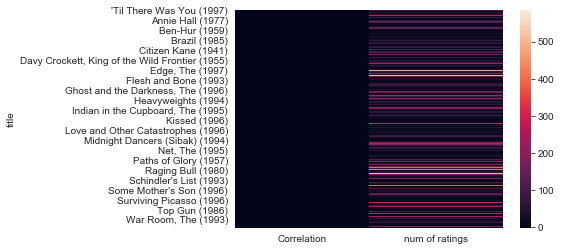

In [120]:
sns.heatmap(corr_liarliar)

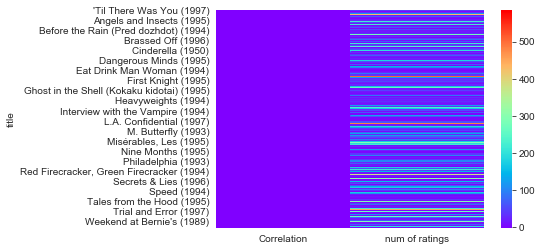

In [123]:
sns.heatmap(corr_starwars, cmap='rainbow')

# Done ,Great!!